In [167]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, recall_score ,precision_score ,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error,r2_score

In [58]:
#importing dataframe
df = pd.read_csv('creditcard.csv')

In [59]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [60]:
#first few rows of dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
#descriptive statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [62]:
#finding the missing values in the columns
df.isna().sum()
#replacing missing values with median value of the column
df['Time'].fillna(df['Time'].median(),inplace=True)
df['Amount'].fillna(df['Amount'].median(),inplace=True)

In [63]:
#count occurrence of unique values in specific column
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
#pairplot
import seaborn as sns
sns.pairplot(df,hue = 'Amount')
plt.show()

In [64]:
#to find number of fraud transactions and valid transactions 
fraud_transaction = df[df['Class'] == 1]
valid_transaction = df[df['Class'] == 0]
#ratio of number of fraud transactions to number of valid transactions
outlier = len(fraud_transaction)/float(len(valid_transaction))
print(outlier)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [65]:
# descriptive statistics of amount column of valid transactions 
print("Amount details of the valid transactions:\n",valid_transaction.Amount.describe())

Amount details of the valid transactions:
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [66]:
# descriptive statistics of amount column of fraud transactions 
print("Amount details of the fraudulent transactions:\n",fraud_transaction.Amount.describe())

Amount details of the fraudulent transactions:
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


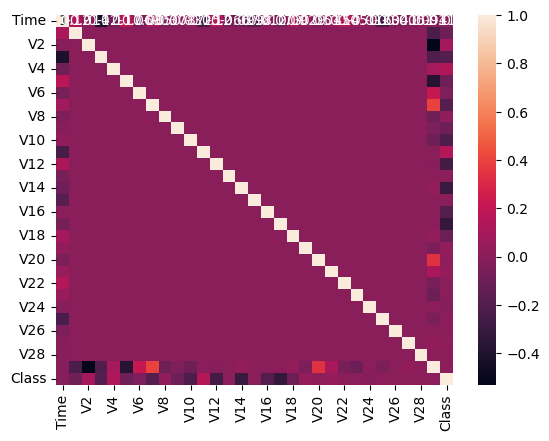

In [67]:
#correlation matrix describes how the features correlatre with each other 
# with the help of correlation matrix we can pick the most relevant feature for the prediction
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()



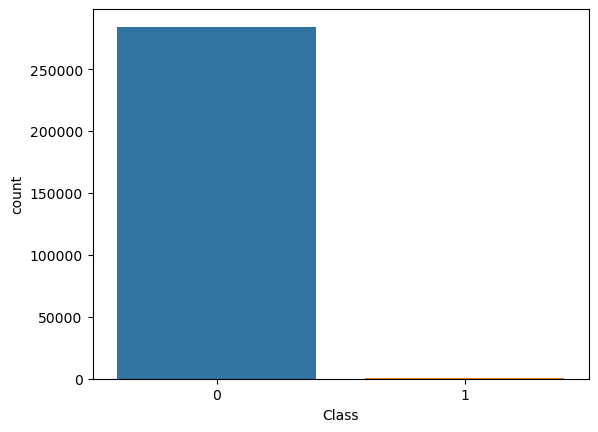

In [68]:
sns.countplot(x = 'Class', data = df)
plt.show()

In [70]:
#Hypothesis testing for feature significance
fradulent = df[df['Class'] == 1]['Amount'].dropna()
non_fradulent = df[df['Class'] == 0]['Amount'].dropna()
t_stat, p_val = stats.ttest_ind(fradulent,non_fradulent)
print(f'T-test for Amount : t-stat = {t_stat}, p-value = {p_val}')
      

T-test for Amount : t-stat = 3.00555231397141, p-value = 0.002651220649191683


In [71]:
#finding the missing values in the columns
df.isna().sum()
#replacing missing values with median value of the column
df['Time'].fillna(df['Time'].median(),inplace=True)
df['Amount'].fillna(df['Amount'].median(),inplace=True)

In [72]:
#to get datatypes of each columns
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [73]:
# Pipelines
# SMOTE
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [74]:
# Define preprocessing for categorical features (impute missing values and one-hot encode)

categorical_features = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [75]:
# Combine preprocessing steps

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [76]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Building Model

In [157]:
# Separate features and target variable
X = df.drop('Class',axis=1)
y = df['Class']

In [135]:
#scalar = StandardScaler()
#X = scalar.fit_transform(X)

In [158]:
#splitting X and Y into training and testing set from the dataset

X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [138]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [159]:
RandomForestClassifier()

RandomForestClassifier()

In [164]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("\n R² Score:", r2)

Mean Squared Error (MSE): 0.00047400021066676027

 R² Score: 0.6891804471390679


In [141]:
#BaseLine model
# Assuming df is your DataFrame with 'Survived' as the target variable
# Separate features and target variable
X = df.drop('Class', axis = 1)
y = df['Class']

In [142]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize logistic regression model
logreg = LogisticRegression(max_iter = 1000)

In [143]:
# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [144]:
# Predict on the test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probability of positive class

In [165]:
# Evaluate the model
print(" Accuracy: ", accuracy_score(y_test, y_pred))
print(" Classification Report: \n", classification_report(y_test, y_pred))

 Accuracy:  0.9995259997893332
 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.95      0.72      0.82        87

    accuracy                           1.00     56962
   macro avg       0.98      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



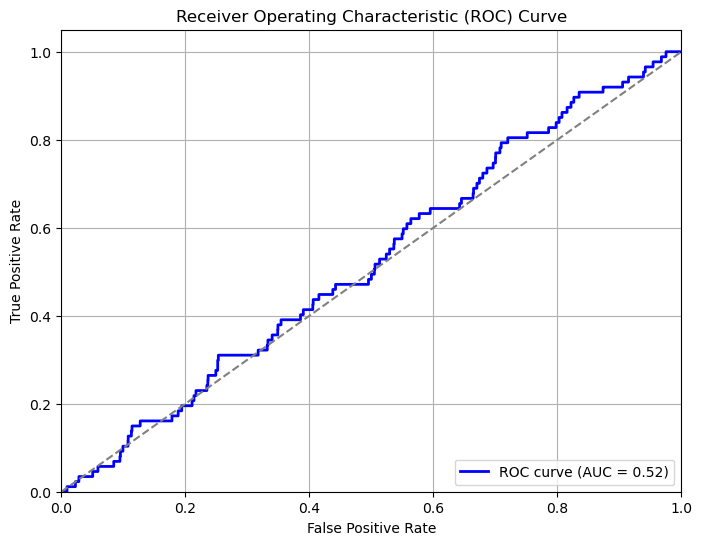

In [168]:
# Calculate ROC curve and ROC area under curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'blue', lw=2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'gray', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = "lower right")
plt.grid(True)
plt.show()

In [146]:
#modeling
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)
y_pred = model.predict(X_test)

In [169]:
#performance of classification model
from sklearn.metrics import classification_report , confusion_matrix
confusionmatrix = np.array(confusion_matrix(y_test,y_pred))
conf = pd.DataFrame(confusionmatrix, index = ['Fraud transaction','Valid transaction'],columns = ['predicted fraud transaction','predicted valid transaction'])
conf

,predicted fraud transaction,predicted valid transaction
Fraud transaction,56872,3
Valid transaction,24,63


In [170]:
#performance metrics
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test,y_pred)
print("\n Precision: ",precision)

recall = recall_score(y_test,y_pred)
print("\n Recall:",recall)

f1score = f1_score(y_test,y_pred)
print("\n f1 score:",f1score)

Accuracy: 0.9995259997893332

 Precision:  0.9545454545454546

 Recall: 0.7241379310344828

 f1 score: 0.823529411764706


<Axes: >

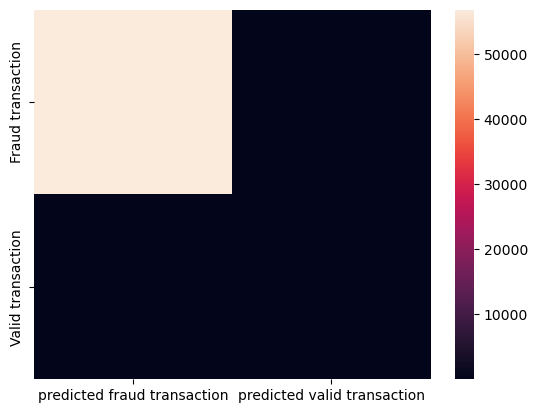

In [171]:
sns.heatmap(conf)